# 1 вариант

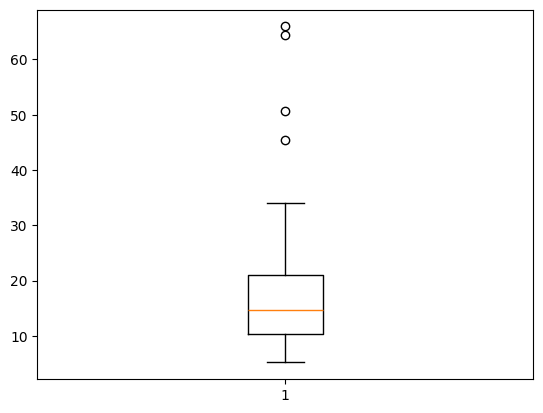

In [ ]:
import numpy as np
from scipy.special import expit

d = 10
r = 3
n = 500
M = 100
iteration = 100

# Фиксированные гиперпараметры
mu_0 = 0.0
mu_w_0 = 2.0
lambda_w_0 = 3.0
gamma_0 = 1.0
alpha_lambda = 1.0
beta_lambda = 1.0

E = np.zeros(M)
t = 0
eps = 1e-6

for m in range(M):
    X = np.random.randn(n, d)
    # Параметры
    w_0 = np.random.normal(mu_w_0, np.sqrt(1/lambda_w_0))
    lambda_w = np.random.gamma(alpha_lambda, 1/beta_lambda)
    mu_w = np.random.normal(mu_0, np.sqrt(1/(gamma_0*lambda_w)))
    w = np.random.normal(mu_w, np.sqrt(1/lambda_w), d)
    lambda_v = np.random.gamma(alpha_lambda, 1/beta_lambda, r)
    mu_v = np.random.normal(mu_0, np.sqrt(1/(gamma_0*lambda_v)), r)
    v = np.random.normal(mu_v, np.sqrt(1/lambda_v), (d, r))

    # Theta_teor
    Theta_teor = np.concatenate((np.array([w_0]), w, v.flatten()))

    double_Sum_teor = 0.5 * np.sum((X @ v)**2 - (X**2) @ (v**2), axis=1)
    p = expit(w_0 + X @ w + double_Sum_teor)
    y = np.random.binomial(1, p, n).astype(np.float64)
    k = y - 1 / 2

    Theta_0 = 0
    Theta_w = np.zeros(d)
    Theta_v = np.zeros(d * r)
    Theta = np.concatenate((np.array([Theta_0]), Theta_w, Theta_v))
    Theta_v_matrix = Theta_v.reshape((d, r))

    model = Theta_0 + X @ Theta_w + 0.5 * np.sum((X @ Theta_v_matrix) ** 2 - (X ** 2) @ (Theta_v_matrix ** 2), axis=1)
    SaveResults = np.zeros((iteration, d + 1 + d * r))

    for i in range(iteration):
        # E-шаг
        C = -1/2 * (1 / (2 * (model + eps)) * np.tanh((model + eps) / 2))

        # Обновление w_0
        A_w0 = np.sum(C) - lambda_w_0 / 2
        B_w0 = np.sum(k + 2 * C * (model - Theta_0)) + lambda_w_0 * mu_w_0
        if A_w0 < 0:
            Theta_0 = -B_w0 / (2 * A_w0)

        model = Theta_0 + X @ Theta_w + 0.5 * np.sum((X @ Theta_v_matrix) ** 2 - (X ** 2) @ (Theta_v_matrix ** 2), axis=1)

        # Обновление w
        for j in range(d):
            A_wj = np.sum(C * X[:, j]**2) - lambda_w / 2
            B_wj = np.sum(k * X[:, j] + 2 * C * (model - Theta_w[j] * X[:, j]) * X[:, j]) + lambda_w * mu_w
            if A_wj < 0:
                Theta_w[j] = -B_wj / (2 * A_wj)

            model = Theta_0 + X @ Theta_w + 0.5 * np.sum((X @ Theta_v_matrix) ** 2 - (X ** 2) @ (Theta_v_matrix ** 2), axis=1)

        # Обновление v
        for j in range(d):
            for f in range(r):
                h_v = X[:, j] * (X @ Theta_v_matrix[:, f]) - Theta_v_matrix[j, f] * X[:, j] ** 2
                A_v = np.sum(C * h_v**2) - lambda_v[f] / 2
                B_v = np.sum(k * h_v + 2 * C * (model - Theta_v_matrix[j, f] * h_v) * h_v) + lambda_v[f] * mu_v[f]
                if A_v < 0:
                    Theta_v_matrix[j, f] = -B_v / (2 * A_v)

                model = Theta_0 + X @ Theta_w + 0.5 * np.sum((X @ Theta_v_matrix) ** 2 - (X ** 2) @ (Theta_v_matrix ** 2), axis=1)

        Theta = np.concatenate((np.array([Theta_0]), Theta_w, Theta_v_matrix.T.flatten()))
        SaveResults[i, :] = Theta

    Theta_final = SaveResults[-1, :]
    E[m] = np.sqrt(np.sum((Theta_teor - Theta_final) ** 2))

import matplotlib.pyplot as plt
plt.boxplot(E)
plt.show()

In [ ]:
print("Теоретические значения:", Theta_teor)
print("Полученные значения:", Theta_final )

Теоретические значения: [ 7.63614003e-01  3.96008876e-01  9.33192128e-04 -4.50025476e-01
 -2.86973464e+00  3.60439846e-01 -4.19144548e+00 -1.67347172e+00
 -1.53759835e-01  1.04062697e-01 -2.17739880e+00 -5.96423347e+00
 -4.56500013e+00 -5.51261206e-01  4.34764400e-01 -5.42487939e+00
 -6.48214999e+00 -2.70954781e-01 -2.97848002e+00  7.30394751e-01
 -1.01526324e+00 -1.77710440e+00  3.54156718e+00 -3.05207118e+00
 -4.04062277e+00 -5.19104243e-01 -2.26343691e+00 -3.50755387e+00
 -9.30790915e-01 -3.68130302e+00 -2.80828027e+00 -3.84184559e+00
 -3.16755284e+00 -4.80027280e+00 -1.41317247e+00 -3.50513891e+00
 -1.78039758e+00  9.35207586e-01 -2.50614564e+00 -1.03291624e+00
  2.33976056e+00]
Полученные значения: [ 0.10349846 -0.21166185 -0.30761092 -0.07691187 -0.61991117  0.34356906
 -0.41297592 -0.0800179  -0.05826386 -0.08889884 -0.25113143 -7.74638769
 -0.14295861 -0.08363661 -0.08521805 -0.27206008 -0.16239224 -0.26344184
 -0.2489181  -0.23087219 -0.14607389  0.89602311 -0.68869222  0.5668

# 2 вариант

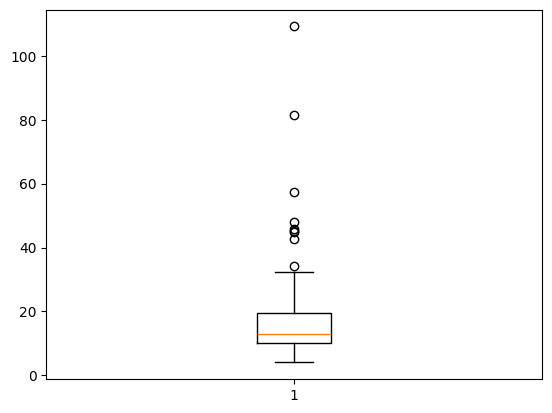

In [ ]:
import numpy as np
from scipy.special import expit

d = 10
r = 3
n = 500
M = 100
iteration = 50
eps = 1e-6

# Фиксированные гиперпараметры
mu_0 = 0.0
mu_w_0 = 2.0
lambda_w_0 = 3.0
gamma_0 = 1.0
alpha_lambda = 1.0
beta_lambda = 1.0

E = np.zeros(M)

for m in range(M):
    X = np.random.randn(n, d)
    # Параметры
    w_0 = np.random.normal(mu_w_0, np.sqrt(1/lambda_w_0))
    lambda_w = np.random.gamma(alpha_lambda, 1/beta_lambda)
    mu_w = np.random.normal(mu_0, np.sqrt(1/(gamma_0 * lambda_w)))
    w = np.random.normal(mu_w, np.sqrt(1/lambda_w), d)
    lambda_v = np.random.gamma(alpha_lambda, 1/beta_lambda, r)
    mu_v = np.random.normal(mu_0, np.sqrt(1/(gamma_0 * lambda_v)), r)
    v = np.random.normal(mu_v, np.sqrt(1/lambda_v), (d, r))

    # Theta_teor
    Theta_teor = np.concatenate((np.array([w_0]), w, v.flatten()))

    double_Sum_teor = 0.5 * np.sum((X @ v)**2 - (X**2) @ (v**2), axis=1)
    p = expit(w_0 + X @ w + double_Sum_teor)
    y = np.random.binomial(1, p, n).astype(np.float64)
    k = y - 1 / 2

    Theta_0 = 0.0
    Theta_w = np.zeros(d)
    Theta_v = np.zeros(d * r)
    Theta = np.concatenate((np.array([Theta_0]), Theta_w, Theta_v))
    Theta_v_matrix = Theta_v.reshape((d, r))

    model = Theta_0 + X @ Theta_w + 0.5 * np.sum((X @ Theta_v_matrix) ** 2 - (X ** 2) @ (Theta_v_matrix ** 2), axis=1)

    SaveResults = np.zeros((iteration, d + 1 + d * r))

    for i in range(iteration):
        # E-шаг
        C = - 1/2 * (1 / (2 * (model + eps)) * np.tanh((model + eps) / 2))

        model_iteration = Theta_0 + X @ Theta_w + 0.5 * np.sum((X @ Theta_v_matrix) ** 2 - (X ** 2) @ (Theta_v_matrix ** 2), axis=1)

        # Обновление w_0
        A_w0 = np.sum(C) - lambda_w_0 / 2
        B_w0 = np.sum(k + 2 * C * (model_iteration - Theta_0)) + lambda_w_0 * mu_w_0
        if A_w0 < 0:
            Theta_0_new = -B_w0 / (2 * A_w0)
            model_iteration += (Theta_0_new - Theta_0)
            Theta_0 = Theta_0_new

        # Обновление w
        for j in range(d):
            A_wj = np.sum(C * X[:, j]**2) - lambda_w / 2
            B_wj = np.sum(k * X[:, j] + 2 * C * (model_iteration - Theta_w[j] * X[:, j]) * X[:, j]) + lambda_w * mu_w
            if A_wj < 0:
                Theta_w_new = -B_wj / (2 * A_wj)
                model_iteration += (Theta_w_new - Theta_w[j]) * X[:, j]
                Theta_w[j] = Theta_w_new


        # Обновление v
        for j in range(d):
            for f in range(r):
                h_v = X[:, j] * (X @ Theta_v_matrix[:, f]) - Theta_v_matrix[j, f] * X[:, j] ** 2
                A_v = np.sum(C * h_v**2) - lambda_v[f] / 2
                B_v = np.sum(k * h_v + 2 * C * (model_iteration - Theta_v_matrix[j, f] * h_v) * h_v) + lambda_v[f] * mu_v[f]
                if A_v < 0:
                    Theta_v_new = -B_v / (2 * A_v)
                    model_iteration += (Theta_v_new  - Theta_v_matrix[j, f]) * h_v
                    Theta_v_matrix[j, f] = Theta_v_new

        model = model_iteration
        Theta = np.concatenate((np.array([Theta_0]), Theta_w, Theta_v_matrix.T.flatten()))
        SaveResults[i, :] = Theta

    Theta_final = SaveResults[-1, :]
    E[m] = np.sqrt(np.sum((Theta_teor - Theta_final) ** 2))

import matplotlib.pyplot as plt
plt.boxplot(E)
plt.show()

# EM на разных итерациях

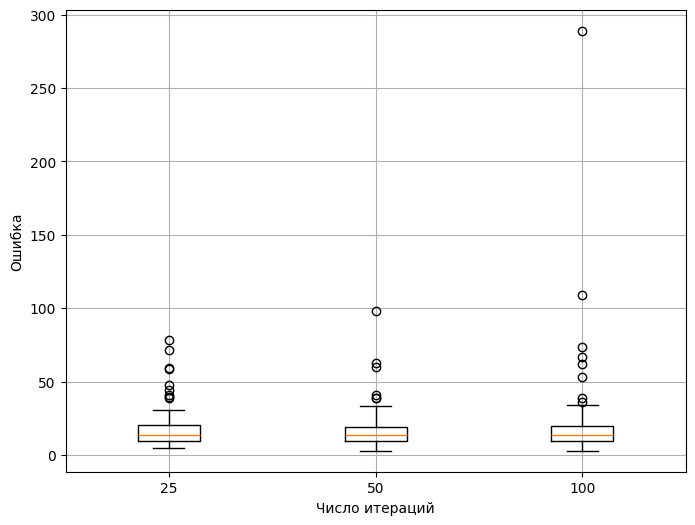

In [ ]:
import numpy as np
from scipy.special import expit
import matplotlib.pyplot as plt

d = 10
r = 3
n = 500
M = 100
eps = 1e-6

# Гиперпараметры
mu_0 = 0.0
mu_w_0 = 2.0
lambda_w_0 = 3.0
gamma_0 = 1.0
alpha_lambda = 1.0
beta_lambda = 1.0

iteration= [25, 50, 100]
errors = {}

for iter in iteration:
    E = np.zeros(M)
    for m in range(M):
      X = np.random.randn(n, d)
      # Параметры
      w_0 = np.random.normal(mu_w_0, np.sqrt(1/lambda_w_0))
      lambda_w = np.random.gamma(alpha_lambda, 1/beta_lambda)
      mu_w = np.random.normal(mu_0, np.sqrt(1/(gamma_0 * lambda_w)))
      w = np.random.normal(mu_w, np.sqrt(1/lambda_w), d)
      lambda_v = np.random.gamma(alpha_lambda, 1/beta_lambda, r)
      mu_v = np.random.normal(mu_0, np.sqrt(1/(gamma_0 * lambda_v)), r)
      v = np.random.normal(mu_v, np.sqrt(1/lambda_v), (d, r))

      # Theta_teor
      Theta_teor = np.concatenate((np.array([w_0]), w, v.flatten()))

      double_Sum_teor = 0.5 * np.sum((X @ v)**2 - (X**2) @ (v**2), axis=1)
      p = expit(w_0 + X @ w + double_Sum_teor)
      y = np.random.binomial(1, p, n).astype(np.float64)
      k = y - 1 / 2

      Theta_0 = 0.0
      Theta_w = np.zeros(d)
      Theta_v = np.zeros(d * r)
      Theta = np.concatenate((np.array([Theta_0]), Theta_w, Theta_v))
      Theta_v_matrix = Theta_v.reshape((d, r))

      model = Theta_0 + X @ Theta_w + 0.5 * np.sum((X @ Theta_v_matrix) ** 2 - (X ** 2) @ (Theta_v_matrix ** 2), axis=1)

      SaveResults = np.zeros((iter, d + 1 + d * r))

      for i in range(iter):
          # E-шаг
          C = - 1/2 * (1 / (2 * (model + eps)) * np.tanh((model + eps) / 2))

          model_iteration = Theta_0 + X @ Theta_w + 0.5 * np.sum((X @ Theta_v_matrix) ** 2 - (X ** 2) @ (Theta_v_matrix ** 2), axis=1)

          # Обновление w_0
          A_w0 = np.sum(C) - lambda_w_0 / 2
          B_w0 = np.sum(k + 2 * C * (model_iteration - Theta_0)) + lambda_w_0 * mu_w_0
          if A_w0 < 0:
              Theta_0_new = -B_w0 / (2 * A_w0)
              model_iteration += (Theta_0_new - Theta_0)
              Theta_0 = Theta_0_new

          # Обновление w
          for j in range(d):
              A_wj = np.sum(C * X[:, j]**2) - lambda_w / 2
              B_wj = np.sum(k * X[:, j] + 2 * C * (model_iteration - Theta_w[j] * X[:, j]) * X[:, j]) + lambda_w * mu_w
              if A_wj < 0:
                  Theta_w_new = -B_wj / (2 * A_wj)
                  model_iteration += (Theta_w_new - Theta_w[j]) * X[:, j]
                  Theta_w[j] = Theta_w_new


          # Обновление v
          for j in range(d):
              for f in range(r):
                  h_v = X[:, j] * (X @ Theta_v_matrix[:, f]) - Theta_v_matrix[j, f] * X[:, j] ** 2
                  A_v = np.sum(C * h_v**2) - lambda_v[f] / 2
                  B_v = np.sum(k * h_v + 2 * C * (model_iteration - Theta_v_matrix[j, f] * h_v) * h_v) + lambda_v[f] * mu_v[f]
                  if A_v < 0:
                      Theta_v_new = -B_v / (2 * A_v)
                      model_iteration += (Theta_v_new  - Theta_v_matrix[j, f]) * h_v
                      Theta_v_matrix[j, f] = Theta_v_new

          model = model_iteration
          Theta_final = np.concatenate([[Theta_0], Theta_w, Theta_v_matrix.flatten()])
          E[m] = np.sqrt(np.sum((Theta_teor - Theta_final) ** 2))

    errors[iter] = E

plt.figure(figsize=(8, 6))
plt.boxplot([errors[it] for it in iteration], tick_labels=[str(it) for it in iteration])
plt.xlabel("Число итераций")
plt.ylabel("Ошибка")
plt.grid(True)
plt.show()


# EM ADAM

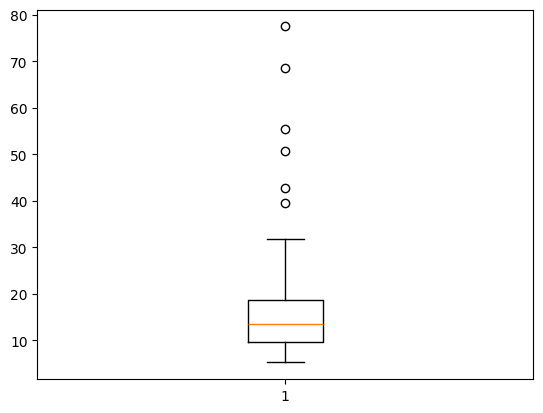

In [ ]:
import numpy as np
from scipy.special import expit

# Параметры модели
d = 10
r = 3
n = 500
M = 100
iteration = 50
eps = 1e-6

# Гиперпараметры
mu_0 = 0.0
mu_w_0 = 2.0
lambda_w_0 = 3.0
gamma_0 = 1.0
alpha_lambda = 1.0
beta_lambda = 1.0

alpha = 0.001
beta_1 = 0.9
beta_2 = 0.999
epsilon = 1e-8

E = np.zeros(M)

for m in range(M):
    # Генерация данных
    X = np.random.randn(n, d)
    w_0 = np.random.normal(mu_w_0, np.sqrt(1/lambda_w_0))
    lambda_w = np.random.gamma(alpha_lambda, 1/beta_lambda)
    mu_w = np.random.normal(mu_0, np.sqrt(1/(gamma_0 * lambda_w)))
    w = np.random.normal(mu_w, np.sqrt(1/lambda_w), d)
    lambda_v = np.random.gamma(alpha_lambda, 1/beta_lambda, r)
    mu_v = np.random.normal(mu_0, np.sqrt(1/(gamma_0 * lambda_v)), r)
    v = np.random.normal(mu_v, np.sqrt(1/lambda_v), (d, r))
    Theta_teor = np.concatenate((np.array([w_0]), w, v.flatten()))

    double_Sum_teor = 0.5 * np.sum((X @ v)**2 - (X**2) @ (v**2), axis=1)
    p = expit(w_0 + X @ w + double_Sum_teor)
    y = np.random.binomial(1, p, n).astype(np.float64)
    k = y - 0.5

    Theta_0 = 0.0
    Theta_w = np.zeros(d)
    Theta_v = np.zeros(d * r)
    Theta = np.concatenate((np.array([Theta_0]), Theta_w, Theta_v))
    Theta_v_matrix = Theta_v.reshape((d, r))

    m_t = np.zeros_like(Theta)
    v_t = np.zeros_like(Theta)
    t = 0

    SaveResults = np.zeros((iteration, d + 1 + d * r))

    for i in range(iteration):
        # E-шаг
        model = Theta_0 + X @ Theta_w + 0.5 * np.sum((X @ Theta_v_matrix) ** 2 - (X ** 2) @ (Theta_v_matrix ** 2), axis=1)
        C = -0.5 * (1 / (2 * (model + eps)) * np.tanh((model + eps) / 2))

        grad = np.zeros_like(Theta)
        # Градиент для w_0
        grad[0] = np.sum(k + 2 * C * model) - lambda_w_0 * (Theta_0 - mu_w_0)

        # Градиент для w_j
        for j in range(d):
            grad[j + 1] = np.sum(k * X[:, j] + 2 * C * model * X[:, j]) - lambda_w * (Theta_w[j] - mu_w)

        # Градиент для v_jf
        for j in range(d):
            for f in range(r):
                h_v = X[:, j] * (X @ Theta_v_matrix[:, f]) - Theta_v_matrix[j, f] * X[:, j] ** 2
                grad_idx = 1 + d + j * r + f
                grad[grad_idx] = np.sum(k * h_v + 2 * C * model * h_v) - lambda_v[f] * (Theta_v_matrix[j, f] - mu_v[f])

        t += 1
        m_t = beta_1 * m_t + (1 - beta_1) * grad
        v_t = beta_2 * v_t + (1 - beta_2) * grad**2
        m_hat = m_t / (1 - beta_1**t)
        v_hat = v_t / (1 - beta_2**t)
        Theta += alpha * m_hat / (np.sqrt(v_hat) + epsilon)

        Theta_0 = Theta[0]
        Theta_w = Theta[1:d+1]
        Theta_v_matrix = Theta[d+1:].reshape((d, r))
        SaveResults[i, :] = Theta

    Theta_final = SaveResults[-1, :]
    E[m] = np.sqrt(np.sum((Theta_teor - Theta_final) ** 2))

import matplotlib.pyplot as plt
plt.boxplot(E)
plt.show()

**Pima Indians Diabetes Dataset**

In [ ]:
import numpy as np
from scipy.special import expit
import pandas as pd
from sklearn.metrics import roc_auc_score

data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv", header=None)
data_matrix = data.values

X = data_matrix[1:501, :8]
y = data_matrix[1:501, 8]
y = np.squeeze(y)

d = X.shape[1]

n = 500
r = 3

iteration = 50

# Фиксированные гиперпараметры
mu_0 = 0.0
mu_w_0 = 2.0
lambda_w_0 = 3.0
gamma_0 = 1.0
alpha_lambda = 1.0
beta_lambda = 1.0

alpha = 0.001
beta_1 = 0.9
beta_2 = 0.999
epsilon = 1e-8

eps = 1e-6
SaveResults = np.zeros((iteration, d + 1 + d * r))

lambda_w = np.random.gamma(alpha_lambda, 1/beta_lambda)
mu_w = np.random.normal(mu_0, np.sqrt(1/(gamma_0*lambda_w)))

lambda_v = np.random.gamma(alpha_lambda, 1/beta_lambda, r)
mu_v = np.random.normal(mu_0, np.sqrt(1/(gamma_0*lambda_v)), r)
# lambda_w = 2
# mu_w = 3

# lambda_v = np.array([3, 2,5])
# mu_v = np.array([1,7,4])

k = y - 1 / 2

Theta_0 = 0
Theta_w = np.zeros(d)
Theta_v = np.zeros(d*r)
Theta_v_matrix = Theta_v.reshape((d, r))
Theta = np.concatenate((np.array([Theta_0]), Theta_w, Theta_v))

m_t = np.zeros_like(Theta)
v_t = np.zeros_like(Theta)
t = 0

for i in range(iteration):
    # E-шаг
    model = Theta_0 + X @ Theta_w + 0.5 * np.sum((X @ Theta_v_matrix) ** 2 - (X ** 2) @ (Theta_v_matrix ** 2), axis=1)
    C = -0.5 * (1 / (2 * (model + eps)) * np.tanh((model + eps) / 2))

    grad = np.zeros_like(Theta)
    # Градиент для w_0
    grad[0] = np.sum(k + 2 * C * model) - lambda_w_0 * (Theta_0 - mu_w_0)

    # Градиент для w_j
    for j in range(d):
        grad[j + 1] = np.sum(k * X[:, j] + 2 * C * model * X[:, j]) - lambda_w * (Theta_w[j] - mu_w)

    # Градиент для v_jf
    for j in range(d):
        for f in range(r):
            h_v = X[:, j] * (X @ Theta_v_matrix[:, f]) - Theta_v_matrix[j, f] * X[:, j] ** 2
            grad_idx = 1 + d + j * r + f
            grad[grad_idx] = np.sum(k * h_v + 2 * C * model * h_v) - lambda_v[f] * (Theta_v_matrix[j, f] - mu_v[f])

    t += 1
    m_t = beta_1 * m_t + (1 - beta_1) * grad
    v_t = beta_2 * v_t + (1 - beta_2) * grad**2
    m_hat = m_t / (1 - beta_1**t)
    v_hat = v_t / (1 - beta_2**t)
    Theta += alpha * m_hat / (np.sqrt(v_hat) + epsilon)

    Theta_0 = Theta[0]
    Theta_w = Theta[1:d+1]
    Theta_v_matrix = Theta[d+1:].reshape((d, r))
    SaveResults[i, :] = Theta

Theta_final = SaveResults[-1, :]
V = Theta_final[(d + 1):].reshape((d, r), order='C')

X1 = data_matrix[501:769, :8]
y1 = data_matrix[501:769, 8]

double_sum = 0.5 * (np.sum((X1 @ V)**2, axis=1) - (X1**2) @ np.sum(V**2, axis=1))
prob = expit(Theta_final[0] + X1 @ np.array(Theta_final[1:(d + 1)])  + double_sum)

# AUC-ROC
auc_roc = roc_auc_score(y1, prob)
print("AUC-ROC:", auc_roc)


AUC-ROC: 0.8431838622639085


**Sonar Dataset**


In [ ]:
import numpy as np
from scipy.special import expit
import pandas as pd
from sklearn.metrics import roc_auc_score

data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data", header=None)
ind = np.random.permutation(207)
data = data.iloc[ind]

n = 120
r = 2

data_new = data.iloc[:121, :]
X = data_new .iloc[1:, :60].values
y = (data_new .iloc[1:, 60] == 'R').astype(np.float64).values

d = X.shape[1]

iteration = 50

# Фиксированные гиперпараметры
mu_0 = 0.0
mu_w_0 = 2.0
lambda_w_0 = 3.0
gamma_0 = 1.0
alpha_lambda = 1.0
beta_lambda = 1.0

alpha = 0.001
beta_1 = 0.9
beta_2 = 0.999
epsilon = 1e-8

eps = 1e-6
SaveResults = np.zeros((iteration, d + 1 + d * r))

lambda_w = np.random.gamma(alpha_lambda, 1/beta_lambda)
mu_w = np.random.normal(mu_0, np.sqrt(1/(gamma_0*lambda_w)))

lambda_v = np.random.gamma(alpha_lambda, 1/beta_lambda, r)
mu_v = np.random.normal(mu_0, np.sqrt(1/(gamma_0*lambda_v)), r)

k = y - 1 / 2

Theta_0 = 0
Theta_w = np.zeros(d)
Theta_v = np.zeros(d*r)
Theta = np.concatenate((np.array([Theta_0]), Theta_w, Theta_v))
Theta_v_matrix = Theta_v.reshape((d, r))

m_t = np.zeros_like(Theta)
v_t = np.zeros_like(Theta)
t = 0

for i in range(iteration):
    # E-шаг
    model = Theta_0 + X @ Theta_w + 0.5 * np.sum((X @ Theta_v_matrix) ** 2 - (X ** 2) @ (Theta_v_matrix ** 2), axis=1)
    C = -0.5 * (1 / (2 * (model + eps)) * np.tanh((model + eps) / 2))

    grad = np.zeros_like(Theta)
    # Градиент для w_0
    grad[0] = np.sum(k + 2 * C * model) - lambda_w_0 * (Theta_0 - mu_w_0)

    # Градиент для w_j
    for j in range(d):
        grad[j + 1] = np.sum(k * X[:, j] + 2 * C * model * X[:, j]) - lambda_w * (Theta_w[j] - mu_w)

    # Градиент для v_jf
    for j in range(d):
        for f in range(r):
            h_v = X[:, j] * (X @ Theta_v_matrix[:, f]) - Theta_v_matrix[j, f] * X[:, j] ** 2
            grad_idx = 1 + d + j * r + f
            grad[grad_idx] = np.sum(k * h_v + 2 * C * model * h_v) - lambda_v[f] * (Theta_v_matrix[j, f] - mu_v[f])

    t += 1
    m_t = beta_1 * m_t + (1 - beta_1) * grad
    v_t = beta_2 * v_t + (1 - beta_2) * grad**2
    m_hat = m_t / (1 - beta_1**t)
    v_hat = v_t / (1 - beta_2**t)
    Theta += alpha * m_hat / (np.sqrt(v_hat) + epsilon)

    Theta_0 = Theta[0]
    Theta_w = Theta[1:d+1]
    Theta_v_matrix = Theta[d+1:].reshape((d, r))
    SaveResults[i, :] = Theta


Theta_final = SaveResults[-1, :]
V = Theta_final[(d + 1):].reshape((d, r), order='C')

X1 = data.iloc[121:208, :60].values.astype(np.float64)
y1 = (data.iloc[121:208, 60] == 'R').astype(np.float64).values

double_sum = 0.5 * (np.sum((X1 @ V)**2, axis=1) - (X1**2) @ np.sum(V**2, axis=1))

prob = expit(Theta_final[0] + X1 @ np.array(Theta_final[1:(d + 1)])  + double_sum)

# AUC-ROC
auc_roc = roc_auc_score(y1, prob)
print("AUC-ROC:", auc_roc)


AUC-ROC: 0.7257452574525745


**Australian Credit Approval DataSet**

In [ ]:
import numpy as np
from scipy.special import expit
import pandas as pd
from sklearn.metrics import roc_auc_score

data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/australian/australian.dat"
data = pd.read_csv(data_url, sep=' ', header=None, na_values='?', skipinitialspace=True)
data = data.dropna().values

n = 500
y = data[1:501, 14]
X = data[1:501, :14]

r = 3
d = X.shape[1]

iteration = 50

# Фиксированные гиперпараметры
mu_0 = 0.0
mu_w_0 = 2.0
lambda_w_0 = 3.0
gamma_0 = 1.0
alpha_lambda = 1.0
beta_lambda = 1.0

alpha = 0.001
beta_1 = 0.9
beta_2 = 0.999
epsilon = 1e-8

eps = 1e-6
SaveResults = np.zeros((iteration, d + 1 + d * r))

lambda_w = np.random.gamma(alpha_lambda, 1/beta_lambda)
mu_w = np.random.normal(mu_0, np.sqrt(1/(gamma_0*lambda_w)))

lambda_v = np.random.gamma(alpha_lambda, 1/beta_lambda, r)
mu_v = np.random.normal(mu_0, np.sqrt(1/(gamma_0*lambda_v)), r)

k = y - 1 / 2

Theta_0 = 0
Theta_w = np.zeros(d)
Theta_v = np.zeros(d*r)

Theta = np.concatenate((np.array([Theta_0]), Theta_w, Theta_v))
Theta_v_matrix = Theta_v.reshape((d, r))

m_t = np.zeros_like(Theta)
v_t = np.zeros_like(Theta)
t = 0

for i in range(iteration):
    # E-шаг
    model = Theta_0 + X @ Theta_w + 0.5 * np.sum((X @ Theta_v_matrix) ** 2 - (X ** 2) @ (Theta_v_matrix ** 2), axis=1)
    C = -0.5 * (1 / (2 * (model + eps)) * np.tanh((model + eps) / 2))

    grad = np.zeros_like(Theta)
    # Градиент для w_0
    grad[0] = np.sum(k + 2 * C * model) - lambda_w_0 * (Theta_0 - mu_w_0)

    # Градиент для w_j
    for j in range(d):
        grad[j + 1] = np.sum(k * X[:, j] + 2 * C * model * X[:, j]) - lambda_w * (Theta_w[j] - mu_w)

    # Градиент для v_jf
    for j in range(d):
        for f in range(r):
            h_v = X[:, j] * (X @ Theta_v_matrix[:, f]) - Theta_v_matrix[j, f] * X[:, j] ** 2
            grad_idx = 1 + d + j * r + f
            grad[grad_idx] = np.sum(k * h_v + 2 * C * model * h_v) - lambda_v[f] * (Theta_v_matrix[j, f] - mu_v[f])

    t += 1
    m_t = beta_1 * m_t + (1 - beta_1) * grad
    v_t = beta_2 * v_t + (1 - beta_2) * grad**2
    m_hat = m_t / (1 - beta_1**t)
    v_hat = v_t / (1 - beta_2**t)
    Theta += alpha * m_hat / (np.sqrt(v_hat) + epsilon)

    Theta_0 = Theta[0]
    Theta_w = Theta[1:d+1]
    Theta_v_matrix = Theta[d+1:].reshape((d, r))
    SaveResults[i, :] = Theta

Theta_final = SaveResults[-1, :]
V = Theta_final[(d + 1):].reshape((d, r), order='C')

X1 = data[501:690,:14]
y1 = data[501:690,14]

double_sum = 0.5 * (np.sum((X1 @ V)**2, axis=1) - (X1**2) @ np.sum(V**2, axis=1))

prob = expit(Theta_final[0] + X1 @ np.array(Theta_final[1:(d + 1)])  + double_sum)

# AUC-ROC
auc_roc = roc_auc_score(y1, prob)
print("AUC-ROC:", auc_roc)

AUC-ROC: 0.8126588126588127


**Banknote Dataset**

In [ ]:
import numpy as np
from scipy.special import expit
import pandas as pd
from sklearn.metrics import roc_auc_score
data_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
data = pd.read_csv(data_url, header=None)
data_matrix = data.values

n = 700
y = data_matrix[1:701, 4]
X = data_matrix[1:701, :4]

r = 2
d = X.shape[1]
iteration = 50

# Фиксированные гиперпараметры
mu_0 = 0.0
mu_w_0 = 2.0
lambda_w_0 = 3.0
gamma_0 = 1.0
alpha_lambda = 1.0
beta_lambda = 1.0

alpha = 0.001
beta_1 = 0.9
beta_2 = 0.999
epsilon = 1e-8

eps = 1e-6
SaveResults = np.zeros((iteration, d + 1 + d * r))

lambda_w = np.random.gamma(alpha_lambda, 1/beta_lambda)
mu_w = np.random.normal(mu_0, np.sqrt(1/(gamma_0*lambda_w)))

lambda_v = np.random.gamma(alpha_lambda, 1/beta_lambda, r)
mu_v = np.random.normal(mu_0, np.sqrt(1/(gamma_0*lambda_v)), r)

# lambda_w = 2
# mu_w = 3

# lambda_v = np.array([3, 2,5])
# mu_v = np.array([1,7,4])

k = y - 1 / 2

Theta_0 = 0
Theta_w = np.zeros(d)
Theta_v = np.zeros(d*r)

Theta = np.concatenate((np.array([Theta_0]), Theta_w, Theta_v))
Theta_v_matrix = Theta_v.reshape((d, r))

m_t = np.zeros_like(Theta)
v_t = np.zeros_like(Theta)
t = 0

for i in range(iteration):
    # E-шаг
    model = Theta_0 + X @ Theta_w + 0.5 * np.sum((X @ Theta_v_matrix) ** 2 - (X ** 2) @ (Theta_v_matrix ** 2), axis=1)
    C = -0.5 * (1 / (2 * (model + eps)) * np.tanh((model + eps) / 2))

    grad = np.zeros_like(Theta)
    # Градиент для w_0
    grad[0] = np.sum(k + 2 * C * model) - lambda_w_0 * (Theta_0 - mu_w_0)

    # Градиент для w_j
    for j in range(d):
        grad[j + 1] = np.sum(k * X[:, j] + 2 * C * model * X[:, j]) - lambda_w * (Theta_w[j] - mu_w)

    # Градиент для v_jf
    for j in range(d):
        for f in range(r):
            h_v = X[:, j] * (X @ Theta_v_matrix[:, f]) - Theta_v_matrix[j, f] * X[:, j] ** 2
            grad_idx = 1 + d + j * r + f
            grad[grad_idx] = np.sum(k * h_v + 2 * C * model * h_v) - lambda_v[f] * (Theta_v_matrix[j, f] - mu_v[f])

    t += 1
    m_t = beta_1 * m_t + (1 - beta_1) * grad
    v_t = beta_2 * v_t + (1 - beta_2) * grad**2
    m_hat = m_t / (1 - beta_1**t)
    v_hat = v_t / (1 - beta_2**t)
    Theta += alpha * m_hat / (np.sqrt(v_hat) + epsilon)

    Theta_0 = Theta[0]
    Theta_w = Theta[1:d+1]
    Theta_v_matrix = Theta[d+1:].reshape((d, r))
    SaveResults[i, :] = Theta

Theta_final = SaveResults[-1, :]
V = Theta_final[(d + 1):].reshape((d, r), order='C')

X1 = data_matrix[701:1372,:4]
y1 = data_matrix[701:1372,4]

double_sum = 0.5 * (np.sum((X1 @ V)**2, axis=1) - (X1**2) @ np.sum(V**2, axis=1))

prob = expit(Theta_final[0] + X1 @ np.array(Theta_final[1:(d + 1)])  + double_sum)

# AUC-ROC
auc_roc = roc_auc_score(y1, prob)
print("AUC-ROC:", auc_roc)

AUC-ROC: 0.8158022037086805


# ДАТАСЕТЫ

**Pima Indians Diabetes Dataset**

In [ ]:
import numpy as np
from scipy.special import expit
import pandas as pd
from sklearn.metrics import roc_auc_score

data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv", header=None)
data_matrix = data.values

X = data_matrix[1:501, :8]
y = data_matrix[1:501, 8]
y = np.squeeze(y)

d = X.shape[1]

n = 500
r = 3

iteration = 50

# Фиксированные гиперпараметры
mu_0 = 0.0
mu_w_0 = 2.0
lambda_w_0 = 3.0
gamma_0 = 1.0
alpha_lambda = 1.0
beta_lambda = 1.0

eps = 1e-6
SaveResults = np.zeros((iteration, d + 1 + d * r))

lambda_w = np.random.gamma(alpha_lambda, 1/beta_lambda)
mu_w = np.random.normal(mu_0, np.sqrt(1/(gamma_0*lambda_w)))

lambda_v = np.random.gamma(alpha_lambda, 1/beta_lambda, r)
mu_v = np.random.normal(mu_0, np.sqrt(1/(gamma_0*lambda_v)), r)
# lambda_w = 2
# mu_w = 3

# lambda_v = np.array([3, 2,5])
# mu_v = np.array([1,7,4])

k = y - 1 / 2

Theta_0 = 0
Theta_w = np.zeros(d)
Theta_v = np.zeros(d*r)
Theta_v_matrix = Theta_v.reshape((d, r))

model = Theta_0 + X @ Theta_w + 0.5 * np.sum((X @ Theta_v_matrix) ** 2 - (X ** 2) @ (Theta_v_matrix ** 2), axis=1)

for i in range(iteration):
    C = -0.5 * (1 / (2 * (model + eps)) * np.tanh((model + eps) / 2))
    model_iteration = Theta_0 + X @ Theta_w + 0.5 * (np.sum((X @ Theta_v_matrix)**2, axis=1) - np.sum((X**2) @ (Theta_v_matrix**2), axis=1))

    # Обновление Theta_0
    A_w0 = np.sum(C) - lambda_w_0 / 2
    B_w0 = np.sum(k + 2 * C * (model_iteration - Theta_0)) + lambda_w_0 * mu_w_0
    if A_w0 < 0:
        Theta_0_new = -B_w0 / (2 * A_w0)
        model_iteration += (Theta_0_new - Theta_0)
        Theta_0 = Theta_0_new

    # Обновление Theta_w
    for j in range(d):
        A_wj = np.sum(C * X[:, j]**2) - lambda_w / 2
        B_wj = np.sum(k * X[:, j] + 2 * C * (model_iteration - Theta_w[j] * X[:, j]) * X[:, j]) + lambda_w * mu_w
        if A_wj < 0:
            Theta_w_new = -B_wj / (2 * A_wj)
            model_iteration += (Theta_w_new - Theta_w[j]) * X[:, j]
            Theta_w[j] = Theta_w_new

    # Обновление Theta_v
    for j in range(d):
        for f in range(r):
            h_v = X[:, j] * (X @ Theta_v_matrix[:, f]) - Theta_v_matrix[j, f] * X[:, j]**2
            A_v = np.sum(C * h_v**2) - lambda_v[f] / 2
            B_v = np.sum(k * h_v + 2 * C * (model_iteration - Theta_v_matrix[j, f] * h_v) * h_v) + lambda_v[f] * mu_v[f]
            if A_v < 0:
                Theta_v_new = -B_v / (2 * A_v)
                model_iteration += (Theta_v_new - Theta_v_matrix[j, f]) * h_v
                Theta_v_matrix[j, f] = Theta_v_new

    model = model_iteration
    Theta = np.concatenate([[Theta_0], Theta_w, Theta_v_matrix.flatten()])
    SaveResults[i, :] = Theta

Theta_final = SaveResults[-1, :]
V = Theta_final[(d + 1):].reshape((d, r), order='C')

X1 = data_matrix[501:769, :8]
y1 = data_matrix[501:769, 8]

double_sum = 0.5 * (np.sum((X1 @ V)**2, axis=1) - (X1**2) @ np.sum(V**2, axis=1))
prob = expit(Theta_final[0] + X1 @ np.array(Theta_final[1:(d + 1)])  + double_sum)

# AUC-ROC
auc_roc = roc_auc_score(y1, prob)
print("AUC-ROC:", auc_roc)


AUC-ROC: 0.8490941796222536


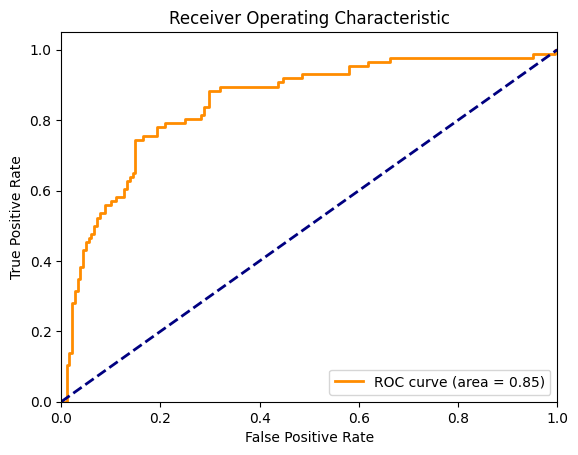

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y1, prob)
roc_auc = auc(fpr, tpr)

# Построение ROC кривой
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Sonar Dataset**

In [ ]:
import numpy as np
from scipy.special import expit
import pandas as pd
from sklearn.metrics import roc_auc_score

data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data", header=None)
ind = np.random.permutation(207)
data = data.iloc[ind]

n = 120
r = 2

data_new = data.iloc[:121, :]
X = data_new .iloc[1:, :60].values
y = (data_new .iloc[1:, 60] == 'R').astype(np.float64).values

d = X.shape[1]

iteration = 50

# Фиксированные гиперпараметры
mu_0 = 0.0
mu_w_0 = 2.0
lambda_w_0 = 3.0
gamma_0 = 1.0
alpha_lambda = 1.0
beta_lambda = 1.0

eps = 1e-6
SaveResults = np.zeros((iteration, d + 1 + d * r))

lambda_w = np.random.gamma(alpha_lambda, 1/beta_lambda)
mu_w = np.random.normal(mu_0, np.sqrt(1/(gamma_0*lambda_w)))

lambda_v = np.random.gamma(alpha_lambda, 1/beta_lambda, r)
mu_v = np.random.normal(mu_0, np.sqrt(1/(gamma_0*lambda_v)), r)

k = y - 1 / 2

Theta_0 = 0
Theta_w = np.zeros(d)
Theta_v = np.zeros(d*r)

Theta = np.concatenate((np.array([Theta_0]), Theta_w, Theta_v))
Theta_v_matrix = Theta_v.reshape((d, r))

model = Theta_0 + X @ Theta_w + 0.5 * np.sum((X @ Theta_v_matrix) ** 2 - (X ** 2) @ (Theta_v_matrix ** 2), axis=1)

for i in range(iteration):
    # E-шаг
    C = - 1/2 * (1 / (2 * (model + eps)) * np.tanh((model + eps) / 2))

    model_iteration = Theta_0 + X @ Theta_w + 0.5 * np.sum((X @ Theta_v_matrix) ** 2 - (X ** 2) @ (Theta_v_matrix ** 2), axis=1)

    # Обновление w_0
    A_w0 = np.sum(C) - lambda_w_0 / 2
    B_w0 = np.sum(k + 2 * C * (model_iteration - Theta_0)) + lambda_w_0 * mu_w_0
    if A_w0 < 0:
        Theta_0_new = -B_w0 / (2 * A_w0)
        model_iteration += (Theta_0_new - Theta_0)
        Theta_0 = Theta_0_new

    # Обновление w
    for j in range(d):
        A_wj = np.sum(C * X[:, j]**2) - lambda_w / 2
        B_wj = np.sum(k * X[:, j] + 2 * C * (model_iteration - Theta_w[j] * X[:, j]) * X[:, j]) + lambda_w * mu_w
        if A_wj < 0:
            Theta_w_new = -B_wj / (2 * A_wj)
            model_iteration += (Theta_w_new - Theta_w[j]) * X[:, j]
            Theta_w[j] = Theta_w_new


    # Обновление v
    for j in range(d):
        for f in range(r):
            h_v = X[:, j] * (X @ Theta_v_matrix[:, f]) - Theta_v_matrix[j, f] * X[:, j] ** 2
            A_v = np.sum(C * h_v**2) - lambda_v[f] / 2
            B_v = np.sum(k * h_v + 2 * C * (model_iteration - Theta_v_matrix[j, f] * h_v) * h_v) + lambda_v[f] * mu_v[f]
            if A_v < 0:
                Theta_v_new = -B_v / (2 * A_v)
                model_iteration += (Theta_v_new  - Theta_v_matrix[j, f]) * h_v
                Theta_v_matrix[j, f] = Theta_v_new

    model = model_iteration
    Theta = np.concatenate([[Theta_0], Theta_w, Theta_v_matrix.flatten()])
    SaveResults[i, :] = Theta

Theta_final = SaveResults[-1, :]
V = Theta_final[(d + 1):].reshape((d, r), order='C')

X1 = data.iloc[121:208, :60].values.astype(np.float64)
y1 = (data.iloc[121:208, 60] == 'R').astype(np.float64).values

double_sum = 0.5 * (np.sum((X1 @ V)**2, axis=1) - (X1**2) @ np.sum(V**2, axis=1))

prob = expit(Theta_final[0] + X1 @ np.array(Theta_final[1:(d + 1)])  + double_sum)

# AUC-ROC
auc_roc = roc_auc_score(y1, prob)
print("AUC-ROC:", auc_roc)


AUC-ROC: 0.8434782608695652


**Australian Credit Approval DataSet**

In [ ]:
import numpy as np
from scipy.special import expit
import pandas as pd
from sklearn.metrics import roc_auc_score

data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/australian/australian.dat"
data = pd.read_csv(data_url, sep=' ', header=None, na_values='?', skipinitialspace=True)
data = data.dropna().values

n = 500
y = data[1:501, 14]
X = data[1:501, :14]

r = 3
d = X.shape[1]

iteration = 50

# Фиксированные гиперпараметры
mu_0 = 0.0
mu_w_0 = 2.0
lambda_w_0 = 3.0
gamma_0 = 1.0
alpha_lambda = 1.0
beta_lambda = 1.0

eps = 1e-6
SaveResults = np.zeros((iteration, d + 1 + d * r))

lambda_w = np.random.gamma(alpha_lambda, 1/beta_lambda)
mu_w = np.random.normal(mu_0, np.sqrt(1/(gamma_0*lambda_w)))

lambda_v = np.random.gamma(alpha_lambda, 1/beta_lambda, r)
mu_v = np.random.normal(mu_0, np.sqrt(1/(gamma_0*lambda_v)), r)

k = y - 1 / 2

Theta_0 = 0
Theta_w = np.zeros(d)
Theta_v = np.zeros(d*r)

Theta = np.concatenate((np.array([Theta_0]), Theta_w, Theta_v))
Theta_v_matrix = Theta_v.reshape((d, r))

model = Theta_0 + X @ Theta_w + 0.5 * np.sum((X @ Theta_v_matrix) ** 2 - (X ** 2) @ (Theta_v_matrix ** 2), axis=1)

for i in range(iteration):
      # E-шаг
      C = - 1/2 * (1 / (2 * (model + eps)) * np.tanh((model + eps) / 2))

      model_iteration = Theta_0 + X @ Theta_w + 0.5 * np.sum((X @ Theta_v_matrix) ** 2 - (X ** 2) @ (Theta_v_matrix ** 2), axis=1)

      # Обновление w_0
      A_w0 = np.sum(C) - lambda_w_0 / 2
      B_w0 = np.sum(k + 2 * C * (model_iteration - Theta_0)) + lambda_w_0 * mu_w_0
      if A_w0 < 0:
          Theta_0_new = -B_w0 / (2 * A_w0)
          model_iteration += (Theta_0_new - Theta_0)
          Theta_0 = Theta_0_new

      # Обновление w
      for j in range(d):
          A_wj = np.sum(C * X[:, j]**2) - lambda_w / 2
          B_wj = np.sum(k * X[:, j] + 2 * C * (model_iteration - Theta_w[j] * X[:, j]) * X[:, j]) + lambda_w * mu_w
          if A_wj < 0:
              Theta_w_new = -B_wj / (2 * A_wj)
              model_iteration += (Theta_w_new - Theta_w[j]) * X[:, j]
              Theta_w[j] = Theta_w_new


      # Обновление v
      for j in range(d):
          for f in range(r):
              h_v = X[:, j] * (X @ Theta_v_matrix[:, f]) - Theta_v_matrix[j, f] * X[:, j] ** 2
              A_v = np.sum(C * h_v**2) - lambda_v[f] / 2
              B_v = np.sum(k * h_v + 2 * C * (model_iteration - Theta_v_matrix[j, f] * h_v) * h_v) + lambda_v[f] * mu_v[f]
              if A_v < 0:
                  Theta_v_new = -B_v / (2 * A_v)
                  model_iteration += (Theta_v_new  - Theta_v_matrix[j, f]) * h_v
                  Theta_v_matrix[j, f] = Theta_v_new

      model = model_iteration
      Theta = np.concatenate([[Theta_0], Theta_w, Theta_v_matrix.flatten()])
      SaveResults[i, :] = Theta

Theta_final = SaveResults[-1, :]
V = Theta_final[(d + 1):].reshape((d, r), order='C')

X1 = data[501:690,:14]
y1 = data[501:690,14]

double_sum = 0.5 * (np.sum((X1 @ V)**2, axis=1) - (X1**2) @ np.sum(V**2, axis=1))

prob = expit(Theta_final[0] + X1 @ np.array(Theta_final[1:(d + 1)])  + double_sum)

# AUC-ROC
auc_roc = roc_auc_score(y1, prob)
print("AUC-ROC:", auc_roc)

AUC-ROC: 0.9301224301224301


**Banknote Dataset**

In [ ]:
import numpy as np
from scipy.special import expit
import pandas as pd
from sklearn.metrics import roc_auc_score
data_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
data = pd.read_csv(data_url, header=None)
data_matrix = data.values

n = 700
y = data_matrix[1:701, 4]
X = data_matrix[1:701, :4]

r = 2
d = X.shape[1]
iteration = 50

# Фиксированные гиперпараметры
mu_0 = 0.0
mu_w_0 = 2.0
lambda_w_0 = 3.0
gamma_0 = 1.0
alpha_lambda = 1.0
beta_lambda = 1.0

eps = 1e-6
SaveResults = np.zeros((iteration, d + 1 + d * r))

lambda_w = np.random.gamma(alpha_lambda, 1/beta_lambda)
mu_w = np.random.normal(mu_0, np.sqrt(1/(gamma_0*lambda_w)))

lambda_v = np.random.gamma(alpha_lambda, 1/beta_lambda, r)
mu_v = np.random.normal(mu_0, np.sqrt(1/(gamma_0*lambda_v)), r)

# lambda_w = 2
# mu_w = 3

# lambda_v = np.array([3, 2,5])
# mu_v = np.array([1,7,4])

k = y - 1 / 2

Theta_0 = 0
Theta_w = np.zeros(d)
Theta_v = np.zeros(d*r)

Theta = np.concatenate((np.array([Theta_0]), Theta_w, Theta_v))
Theta_v_matrix = Theta_v.reshape((d, r))

model = Theta_0 + X @ Theta_w + 0.5 * np.sum((X @ Theta_v_matrix) ** 2 - (X ** 2) @ (Theta_v_matrix ** 2), axis=1)

for i in range(iteration):
      # E-шаг
      C = - 1/2 * (1 / (2 * (model + eps)) * np.tanh((model + eps) / 2))

      model_iteration = Theta_0 + X @ Theta_w + 0.5 * np.sum((X @ Theta_v_matrix) ** 2 - (X ** 2) @ (Theta_v_matrix ** 2), axis=1)

      # Обновление w_0
      A_w0 = np.sum(C) - lambda_w_0 / 2
      B_w0 = np.sum(k + 2 * C * (model_iteration - Theta_0)) + lambda_w_0 * mu_w_0
      if A_w0 < 0:
          Theta_0_new = -B_w0 / (2 * A_w0)
          model_iteration += (Theta_0_new - Theta_0)
          Theta_0 = Theta_0_new

      # Обновление w
      for j in range(d):
          A_wj = np.sum(C * X[:, j]**2) - lambda_w / 2
          B_wj = np.sum(k * X[:, j] + 2 * C * (model_iteration - Theta_w[j] * X[:, j]) * X[:, j]) + lambda_w * mu_w
          if A_wj < 0:
              Theta_w_new = -B_wj / (2 * A_wj)
              model_iteration += (Theta_w_new - Theta_w[j]) * X[:, j]
              Theta_w[j] = Theta_w_new


      # Обновление v
      for j in range(d):
          for f in range(r):
              h_v = X[:, j] * (X @ Theta_v_matrix[:, f]) - Theta_v_matrix[j, f] * X[:, j] ** 2
              A_v = np.sum(C * h_v**2) - lambda_v[f] / 2
              B_v = np.sum(k * h_v + 2 * C * (model_iteration - Theta_v_matrix[j, f] * h_v) * h_v) + lambda_v[f] * mu_v[f]
              if A_v < 0:
                  Theta_v_new = -B_v / (2 * A_v)
                  model_iteration += (Theta_v_new  - Theta_v_matrix[j, f]) * h_v
                  Theta_v_matrix[j, f] = Theta_v_new

      model = model_iteration
      Theta = np.concatenate([[Theta_0], Theta_w, Theta_v_matrix.flatten()])
      SaveResults[i, :] = Theta

Theta_final = SaveResults[-1, :]
V = Theta_final[(d + 1):].reshape((d, r), order='C')

X1 = data_matrix[701:1372,:4]
y1 = data_matrix[701:1372,4]

double_sum = 0.5 * (np.sum((X1 @ V)**2, axis=1) - (X1**2) @ np.sum(V**2, axis=1))

prob = expit(Theta_final[0] + X1 @ np.array(Theta_final[1:(d + 1)])  + double_sum)

# AUC-ROC
auc_roc = roc_auc_score(y1, prob)
print("AUC-ROC:", auc_roc)

AUC-ROC: 0.9968556839559257


# MovieLens small

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.base import BaseEstimator

%pylab inline
!wget http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
!unzip ml-latest-small.zip
ratings = pd.read_csv('./ml-latest-small/ratings.csv', parse_dates=['timestamp'])
ratings.head()
ratings.rating.value_counts()

Populating the interactive namespace from numpy and matplotlib
--2025-05-26 06:57:26--  http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip’

ml-latest-small.zip 100%[===================>] 955.28K   958KB/s    in 1.0s    

2025-05-26 06:57:27 (958 KB/s) - ‘ml-latest-small.zip’ saved [978202/978202]

Archive:  ml-latest-small.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


<ipython-input-2-4ed1833c99e7>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ratings = pd.read_csv('./ml-latest-small/ratings.csv', parse_dates=['timestamp'])


,count
rating,
4.0,26818
3.0,20047
5.0,13211
3.5,13136
4.5,8551
2.0,7551
2.5,5550
1.0,2811
1.5,1791


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score
from scipy.special import expit
import os

ratings = pd.read_csv('./ml-latest-small/ratings.csv')

ratings['binary_rating'] = (ratings['rating'] >= 4).astype(int)

encoder = OneHotEncoder(sparse_output=True, handle_unknown='ignore')
X = encoder.fit_transform(ratings[['userId', 'movieId']])
y = ratings['binary_rating'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X = X_train.toarray()
X1 = X_test.toarray()
y = y_train
y1 = y_test

n = X.shape[0]
d = X.shape[1]
r = 3
iteration = 1

# Гиперпараметры
mu_0 = 0.0
mu_w_0 = 2.0
lambda_w_0 = 3.0
gamma_0 = 1.0
alpha_lambda = 1.0
beta_lambda = 1.0
eps = 1e-6

lambda_w = np.random.gamma(alpha_lambda, 1/beta_lambda)
mu_w = np.random.normal(mu_0, np.sqrt(1/(gamma_0*lambda_w)))
lambda_v = np.random.gamma(alpha_lambda, 1/beta_lambda, r)
mu_v = np.random.normal(mu_0, np.sqrt(1/(gamma_0*lambda_v)), r)

k = y - 0.5

Theta_0 = 0
Theta_w = np.zeros(d)
Theta_v = np.zeros(d * r)
Theta_v_matrix = Theta_v.reshape((d, r))
SaveResults = np.zeros((iteration, d + 1 + d * r))

model = Theta_0 + X @ Theta_w + 0.5 * np.sum((X @ Theta_v_matrix) ** 2 - (X ** 2) @ (Theta_v_matrix ** 2), axis=1)

for i in range(iteration):
    C = -0.5 * (1 / (2 * (model + eps)) * np.tanh((model + eps) / 2))
    model_iteration = Theta_0 + X @ Theta_w + 0.5 * (np.sum((X @ Theta_v_matrix)**2, axis=1) - np.sum((X**2) @ (Theta_v_matrix**2), axis=1))

    A_w0 = np.sum(C) - lambda_w_0 / 2
    B_w0 = np.sum(k + 2 * C * (model_iteration - Theta_0)) + lambda_w_0 * mu_w_0
    if A_w0 < 0:
        Theta_0_new = -B_w0 / (2 * A_w0)
        model_iteration += (Theta_0_new - Theta_0)
        Theta_0 = Theta_0_new

    for j in range(d):
        A_wj = np.sum(C * X[:, j]**2) - lambda_w / 2
        B_wj = np.sum(k * X[:, j] + 2 * C * (model_iteration - Theta_w[j] * X[:, j]) * X[:, j]) + lambda_w * mu_w
        if A_wj < 0:
            Theta_w_new = -B_wj / (2 * A_wj)
            model_iteration += (Theta_w_new - Theta_w[j]) * X[:, j]
            Theta_w[j] = Theta_w_new

    for j in range(d):
        for f in range(r):
            h_v = X[:, j] * (X @ Theta_v_matrix[:, f]) - Theta_v_matrix[j, f] * X[:, j]**2
            A_v = np.sum(C * h_v**2) - lambda_v[f] / 2
            B_v = np.sum(k * h_v + 2 * C * (model_iteration - Theta_v_matrix[j, f] * h_v) * h_v) + lambda_v[f] * mu_v[f]
            if A_v < 0:
                Theta_v_new = -B_v / (2 * A_v)
                model_iteration += (Theta_v_new - Theta_v_matrix[j, f]) * h_v
                Theta_v_matrix[j, f] = Theta_v_new

    model = model_iteration
    Theta = np.concatenate([[Theta_0], Theta_w, Theta_v_matrix.flatten()])
    SaveResults[i, :] = Theta

Theta_final = SaveResults[-1, :]
V = Theta_final[(d + 1):].reshape((d, r), order='C')

double_sum = 0.5 * (np.sum((X1 @ V)**2, axis=1) - (X1**2) @ np.sum(V**2, axis=1))
prob = expit(Theta_final[0] + X1 @ np.array(Theta_final[1:(d + 1)]) + double_sum)

auc_roc = roc_auc_score(y1, prob)
print(f"AUC-ROC: {auc_roc:.4f}")

<ipython-input-10-069e9e225561>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ratings = pd.read_csv('./ml-latest-small/ratings.csv', parse_dates=['timestamp'])


KeyboardInterrupt: 

# MovieLens lightFM

In [ ]:
pip install lightfm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.4/316.4 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lightfm: filename=lightfm-1.17-cp311-cp311-linux_x86_64.whl size=831162 sha256=944c0eabb4130f9012140ca7f7caa192b080f6b3d59a9a3075f327a072f00509
  Stored in directory: /root/.cache/pip/wheels/b9/0d/8a/0729d2e6e3ca2a898ba55201f905da7db3f838a33df5b3fcdd
Successfully built lightfm


In [ ]:
import numpy as np
from scipy.sparse import identity, hstack, vstack
from lightfm.datasets import fetch_movielens
from scipy.special import expit
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

movielens = fetch_movielens()
train = movielens['train'].tocsr()
test = movielens['test'].tocsr()

n_users = train.shape[0]
n_item_features = movielens['item_features'].shape[1]
d = n_users + n_item_features

user_features = identity(n_users, format='csr')
movie_features = movielens['item_features']

rows, cols = train.nonzero()
ratings = train.data
y = (ratings >= 4).astype(np.int32)
n_samples = len(ratings)
X = []
for user_id, movie_id in zip(rows, cols):
    user_vec = user_features[user_id]
    movie_vec = movie_features[movie_id]
    combined_vec = hstack([user_vec, movie_vec]).tocsr()
    X.append(combined_vec)
X = vstack(X)

test_rows, test_cols = test.nonzero()
test_ratings = test.data
y1 = (test_ratings >= 4).astype(np.int32)
n_test_samples = len(test_ratings)

X1 = []
for user_id, movie_id in zip(test_rows, test_cols):
    user_vec = user_features[user_id]
    movie_vec = movie_features[movie_id]
    combined_vec = hstack([user_vec, movie_vec]).tocsr()
    X1.append(combined_vec)
X1 = vstack(X1)

r = 8

k = y - 0.5
iteration = 50
mu_0 = 0.0
mu_w_0 = 2.0
lambda_w_0 = 3.0
gamma_0 = 1.0
alpha_lambda = 1.0
beta_lambda = 1.0
eps = 1e-6

lambda_w = np.random.gamma(alpha_lambda, 1/beta_lambda)
mu_w = np.random.normal(mu_0, np.sqrt(1/(gamma_0*lambda_w)))
lambda_v = np.random.gamma(alpha_lambda, 1/beta_lambda, r)
mu_v = np.random.normal(mu_0, np.sqrt(1/(gamma_0*lambda_v)), r)

Theta_0 = 0.0
Theta_w = np.zeros(d)
Theta_v = np.zeros(d * r)
Theta_v_matrix = Theta_v.reshape((d, r))

X_squared = X.multiply(X)
model = Theta_0 + X @ Theta_w + 0.5 * (np.sum((X @ Theta_v_matrix) ** 2, axis=1) - np.sum(X_squared @ (Theta_v_matrix ** 2), axis=1))

SaveResults = np.zeros((iteration, d + 1 + d * r))

for i in range(iteration):
    C = -0.5 * (1 / (2 * (model + eps)) * np.tanh((model + eps) / 2))
    model_iteration = Theta_0 + X @ Theta_w + 0.5 * (np.sum((X @ Theta_v_matrix)**2, axis=1) - np.sum(X_squared @ (Theta_v_matrix**2), axis=1))

    A_w0 = np.sum(C) - lambda_w_0 / 2
    B_w0 = np.sum(k + 2 * C * (model_iteration - Theta_0)) + lambda_w_0 * mu_w_0
    if A_w0 < 0:
        Theta_0_new = -B_w0 / (2 * A_w0)
        model_iteration += (Theta_0_new - Theta_0)
        Theta_0 = Theta_0_new

    for j in range(d):
        X_j = X[:, j].toarray().flatten()
        A_wj = np.sum(C * X_j**2) - lambda_w / 2
        B_wj = np.sum(k * X_j + 2 * C * (model_iteration - Theta_w[j] * X_j) * X_j) + lambda_w * mu_w
        if A_wj < 0:
            Theta_w_new = -B_wj / (2 * A_wj)
            model_iteration += (Theta_w_new - Theta_w[j]) * X_j
            Theta_w[j] = Theta_w_new

    for j in range(d):
        X_j = X[:, j].toarray().flatten()
        for f in range(r):
            h_v = X_j * (X @ Theta_v_matrix[:, f]) - Theta_v_matrix[j, f] * X_j**2
            A_v = np.sum(C * h_v**2) - lambda_v[f] / 2
            B_v = np.sum(k * h_v + 2 * C * (model_iteration - Theta_v_matrix[j, f] * h_v) * h_v) + lambda_v[f] * mu_v[f]
            if A_v < 0:
                Theta_v_new = -B_v / (2 * A_v)
                model_iteration += (Theta_v_new - Theta_v_matrix[j, f]) * h_v
                Theta_v_matrix[j, f] = Theta_v_new

    model = model_iteration
    Theta = np.concatenate([[Theta_0], Theta_w, Theta_v_matrix.flatten()])
    SaveResults[i, :] = Theta

Theta_final = SaveResults[-1, :]
V = Theta_final[(d + 1):].reshape((d, r), order='C')

X1_squared = X1.multiply(X1)
double_sum = 0.5 * (np.sum((X1 @ V)**2, axis=1) - (X1_squared @ np.sum(V**2, axis=1)))
prob = expit(Theta_final[0] + X1 @ np.array(Theta_final[1:(d + 1)]) + double_sum)

auc_roc = roc_auc_score(y1, prob)
print("AUC-ROC на тестовой выборке:", auc_roc)

AUC-ROC на тестовой выборке: 0.7324316640176444


+признаки пользователей

In [ ]:
import pandas as pd
import numpy as np
from scipy.sparse import identity, hstack, vstack, csr_matrix
from scipy.special import expit
from sklearn.metrics import roc_auc_score
from lightfm.cross_validation import random_train_test_split

url = 'http://files.grouplens.org/datasets/movielens/ml-100k/u.data'
columns = ['userID', 'itemID', 'rating', 'timestamp']
data = pd.read_csv(url, sep='\t', names=columns)

movie_url = 'http://files.grouplens.org/datasets/movielens/ml-100k/u.item'
movie_columns = ['itemID', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown',
                 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama',
                 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv(movie_url, sep='|', names=movie_columns, encoding='latin-1')

user_feature_URL = 'http://files.grouplens.org/datasets/movielens/ml-100k/u.user'
columns_user = ['userID', 'age', 'gender', 'occupation', 'zipcode']
user_data = pd.read_csv(user_feature_URL, sep='|', names=columns_user)

rows = data['userID'] - 1
cols = data['itemID'] - 1
ratings = data['rating']
interactions = csr_matrix((ratings, (rows, cols)))

train, test = random_train_test_split(interactions, test_percentage=0.2, random_state=np.random.RandomState(42))

movie_features = csr_matrix(movies[movie_columns[5:]].values)

all_occupations = sorted(list(set(user_data['occupation'])))
occupation_matrix = np.zeros((len(user_data), len(all_occupations)))
for i, occ in enumerate(user_data['occupation']):
    occupation_matrix[i, all_occupations.index(occ)] = 1
user_features = hstack([identity(interactions.shape[0], format='csr'), csr_matrix(occupation_matrix)])

train_rows, train_cols = train.nonzero()
y = (train.data >= 4).astype(np.int32)
X = [hstack([user_features[user_id], movie_features[movie_id]]).tocsr() for user_id, movie_id in zip(train_rows, train_cols)]
X = vstack(X)

test_rows, test_cols = test.nonzero()
y1 = (test.data >= 4).astype(np.int32)
X1 = [hstack([user_features[user_id], movie_features[movie_id]]).tocsr() for user_id, movie_id in zip(test_rows, test_cols)]
X1 = vstack(X1)

n_users = interactions.shape[0]
n_item_features = movie_features.shape[1]
n_occupations = len(all_occupations)
d = n_users + n_item_features + n_occupations

r = 8
iteration = 50

mu_0 = 0.0
mu_w_0 = 2.0
lambda_w_0 = 3.0
gamma_0 = 1.0
alpha_lambda = 1.0
beta_lambda = 1.0
eps = 1e-6

lambda_w = np.random.gamma(alpha_lambda, 1/beta_lambda)
mu_w = np.random.normal(mu_0, np.sqrt(1/(gamma_0*lambda_w)))
lambda_v = np.random.gamma(alpha_lambda, 1/beta_lambda, r)
mu_v = np.random.normal(mu_0, np.sqrt(1/(gamma_0*lambda_v)), r)

Theta_0 = 0.0
Theta_w = np.zeros(d)
Theta_v = np.zeros(d * r)
Theta_v_matrix = Theta_v.reshape((d, r))

X_squared = X.multiply(X)
model = Theta_0 + X @ Theta_w + 0.5 * (np.sum((X @ Theta_v_matrix) ** 2, axis=1) - np.sum(X_squared @ (Theta_v_matrix ** 2), axis=1))

SaveResults = np.zeros((iteration, d + 1 + d * r))

for i in range(iteration):
    C = -0.5 * (1 / (2 * (model + eps)) * np.tanh((model + eps) / 2))
    model_iteration = Theta_0 + X @ Theta_w + 0.5 * (np.sum((X @ Theta_v_matrix)**2, axis=1) - np.sum(X_squared @ (Theta_v_matrix**2), axis=1))

    A_w0 = np.sum(C) - lambda_w_0 / 2
    B_w0 = np.sum(y - 0.5 + 2 * C * (model_iteration - Theta_0)) + lambda_w_0 * mu_w_0
    if A_w0 < 0:
        Theta_0_new = -B_w0 / (2 * A_w0)
        model_iteration += (Theta_0_new - Theta_0)
        Theta_0 = Theta_0_new

    for j in range(d):
        X_j = X[:, j].toarray().flatten()
        A_wj = np.sum(C * X_j**2) - lambda_w / 2
        B_wj = np.sum((y - 0.5) * X_j + 2 * C * (model_iteration - Theta_w[j] * X_j) * X_j) + lambda_w * mu_w
        if A_wj < 0:
            Theta_w_new = -B_wj / (2 * A_wj)
            model_iteration += (Theta_w_new - Theta_w[j]) * X_j
            Theta_w[j] = Theta_w_new

    for j in range(d):
        X_j = X[:, j].toarray().flatten()
        for f in range(r):
            h_v = X_j * (X @ Theta_v_matrix[:, f]) - Theta_v_matrix[j, f] * X_j**2
            A_v = np.sum(C * h_v**2) - lambda_v[f] / 2
            B_v = np.sum((y - 0.5) * h_v + 2 * C * (model_iteration - Theta_v_matrix[j, f] * h_v) * h_v) + lambda_v[f] * mu_v[f]
            if A_v < 0:
                Theta_v_new = -B_v / (2 * A_v)
                model_iteration += (Theta_v_new - Theta_v_matrix[j, f]) * h_v
                Theta_v_matrix[j, f] = Theta_v_new

    model = model_iteration
    Theta = np.concatenate([[Theta_0], Theta_w, Theta_v_matrix.flatten()])
    SaveResults[i, :] = Theta

Theta_final = SaveResults[-1, :]
V = Theta_final[(d + 1):].reshape((d, r), order='C')

X1_squared = X1.multiply(X1)

double_sum = 0.5 * (np.sum((X1 @ V)**2, axis=1) - (X1_squared @ np.sum(V**2, axis=1)))
prob = expit(Theta_final[0] + X1 @ np.array(Theta_final[1:(d + 1)]) + double_sum)

auc_roc = roc_auc_score(y1, prob)
print("AUC-ROC на тестовой выборке:", auc_roc)


AUC-ROC на тестовой выборке: 0.6989815838696454


In [ ]:
import pandas as pd
import numpy as np
from scipy.sparse import identity, hstack, vstack, csr_matrix
from scipy.special import expit
from sklearn.metrics import roc_auc_score
from lightfm.cross_validation import random_train_test_split

url = 'http://files.grouplens.org/datasets/movielens/ml-100k/u.data'
columns = ['userID', 'itemID', 'rating', 'timestamp']
data = pd.read_csv(url, sep='\t', names=columns)

movie_url = 'http://files.grouplens.org/datasets/movielens/ml-100k/u.item'
movie_columns = ['itemID', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown',
                 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama',
                 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv(movie_url, sep='|', names=movie_columns, encoding='latin-1')

user_feature_URL = 'http://files.grouplens.org/datasets/movielens/ml-100k/u.user'
columns_user = ['userID', 'age', 'gender', 'occupation', 'zipcode']
user_data = pd.read_csv(user_feature_URL, sep='|', names=columns_user)

rows = data['userID'] - 1
cols = data['itemID'] - 1
ratings = data['rating']
interactions = csr_matrix((ratings, (rows, cols)))

train, test = random_train_test_split(interactions, test_percentage=0.2, random_state=np.random.RandomState(42))

movie_features = csr_matrix(movies[movie_columns[5:]].values)

all_occupations = sorted(list(set(user_data['occupation'])))
occupation_matrix = np.zeros((len(user_data), len(all_occupations)))
for i, occ in enumerate(user_data['occupation']):
    occupation_matrix[i, all_occupations.index(occ)] = 1
user_features = hstack([identity(interactions.shape[0], format='csr'), csr_matrix(occupation_matrix)])

train_rows, train_cols = train.nonzero()
y = (train.data >= 4).astype(np.int32)
X = [hstack([user_features[user_id], movie_features[movie_id]]).tocsr() for user_id, movie_id in zip(train_rows, train_cols)]
X = vstack(X)

test_rows, test_cols = test.nonzero()
y1 = (test.data >= 4).astype(np.int32)
X1 = [hstack([user_features[user_id], movie_features[movie_id]]).tocsr() for user_id, movie_id in zip(test_rows, test_cols)]
X1 = vstack(X1)

n_users = interactions.shape[0]
n_item_features = movie_features.shape[1]
n_occupations = len(all_occupations)
d = n_users + n_item_features + n_occupations

r = 3
iteration = 50

mu_0 = 0.0
mu_w_0 = 2.0
lambda_w_0 = 3.0
gamma_0 = 1.0
alpha_lambda = 1.0
beta_lambda = 1.0
eps = 1e-6

lambda_w = np.random.gamma(alpha_lambda, 1/beta_lambda)
mu_w = np.random.normal(mu_0, np.sqrt(1/(gamma_0*lambda_w)))
lambda_v = np.random.gamma(alpha_lambda, 1/beta_lambda, r)
mu_v = np.random.normal(mu_0, np.sqrt(1/(gamma_0*lambda_v)), r)

Theta_0 = 0.0
Theta_w = np.zeros(d)
Theta_v = np.zeros(d * r)
Theta_v_matrix = Theta_v.reshape((d, r))

X_squared = X.multiply(X)
model = Theta_0 + X @ Theta_w + 0.5 * (np.sum((X @ Theta_v_matrix) ** 2, axis=1) - np.sum(X_squared @ (Theta_v_matrix ** 2), axis=1))

SaveResults = np.zeros((iteration, d + 1 + d * r))

for i in range(iteration):
    C = -0.5 * (1 / (2 * (model + eps)) * np.tanh((model + eps) / 2))
    model_iteration = Theta_0 + X @ Theta_w + 0.5 * (np.sum((X @ Theta_v_matrix)**2, axis=1) - np.sum(X_squared @ (Theta_v_matrix**2), axis=1))

    A_w0 = np.sum(C) - lambda_w_0 / 2
    B_w0 = np.sum(y - 0.5 + 2 * C * (model_iteration - Theta_0)) + lambda_w_0 * mu_w_0
    if A_w0 < 0:
        Theta_0_new = -B_w0 / (2 * A_w0)
        model_iteration += (Theta_0_new - Theta_0)
        Theta_0 = Theta_0_new

    for j in range(d):
        X_j = X[:, j].toarray().flatten()
        A_wj = np.sum(C * X_j**2) - lambda_w / 2
        B_wj = np.sum((y - 0.5) * X_j + 2 * C * (model_iteration - Theta_w[j] * X_j) * X_j) + lambda_w * mu_w
        if A_wj < 0:
            Theta_w_new = -B_wj / (2 * A_wj)
            model_iteration += (Theta_w_new - Theta_w[j]) * X_j
            Theta_w[j] = Theta_w_new

    for j in range(d):
        X_j = X[:, j].toarray().flatten()
        for f in range(r):
            h_v = X_j * (X @ Theta_v_matrix[:, f]) - Theta_v_matrix[j, f] * X_j**2
            A_v = np.sum(C * h_v**2) - lambda_v[f] / 2
            B_v = np.sum((y - 0.5) * h_v + 2 * C * (model_iteration - Theta_v_matrix[j, f] * h_v) * h_v) + lambda_v[f] * mu_v[f]
            if A_v < 0:
                Theta_v_new = -B_v / (2 * A_v)
                model_iteration += (Theta_v_new - Theta_v_matrix[j, f]) * h_v
                Theta_v_matrix[j, f] = Theta_v_new

    model = model_iteration
    Theta = np.concatenate([[Theta_0], Theta_w, Theta_v_matrix.flatten()])
    SaveResults[i, :] = Theta

Theta_final = SaveResults[-1, :]
V = Theta_final[(d + 1):].reshape((d, r), order='C')

X1_squared = X1.multiply(X1)

double_sum = 0.5 * (np.sum((X1 @ V)**2, axis=1) - (X1_squared @ np.sum(V**2, axis=1)))
prob = expit(Theta_final[0] + X1 @ np.array(Theta_final[1:(d + 1)]) + double_sum)

auc_roc = roc_auc_score(y1, prob)
print("AUC-ROC на тестовой выборке:", auc_roc)


AUC-ROC на тестовой выборке: 0.7022459693458125


In [ ]:
import pandas as pd
import numpy as np
from scipy.sparse import identity, hstack, vstack, csr_matrix
from scipy.special import expit
from sklearn.metrics import roc_auc_score
from lightfm.cross_validation import random_train_test_split

url = 'http://files.grouplens.org/datasets/movielens/ml-100k/u.data'
columns = ['userID', 'itemID', 'rating', 'timestamp']
data = pd.read_csv(url, sep='\t', names=columns)

movie_url = 'http://files.grouplens.org/datasets/movielens/ml-100k/u.item'
movie_columns = ['itemID', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown',
                 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama',
                 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv(movie_url, sep='|', names=movie_columns, encoding='latin-1')

user_feature_URL = 'http://files.grouplens.org/datasets/movielens/ml-100k/u.user'
columns_user = ['userID', 'age', 'gender', 'occupation', 'zipcode']
user_data = pd.read_csv(user_feature_URL, sep='|', names=columns_user)

rows = data['userID'] - 1
cols = data['itemID'] - 1
ratings = data['rating']
interactions = csr_matrix((ratings, (rows, cols)))

train, test = random_train_test_split(interactions, test_percentage=0.2, random_state=np.random.RandomState(42))

movie_features = csr_matrix(movies[movie_columns[5:]].values)

all_occupations = sorted(list(set(user_data['occupation'])))
occupation_matrix = np.zeros((len(user_data), len(all_occupations)))
for i, occ in enumerate(user_data['occupation']):
    occupation_matrix[i, all_occupations.index(occ)] = 1
user_features = hstack([identity(interactions.shape[0], format='csr'), csr_matrix(occupation_matrix)])

train_rows, train_cols = train.nonzero()
y = (train.data >= 4).astype(np.int32)
X = [hstack([user_features[user_id], movie_features[movie_id]]).tocsr() for user_id, movie_id in zip(train_rows, train_cols)]
X = vstack(X)

test_rows, test_cols = test.nonzero()
y1 = (test.data >= 4).astype(np.int32)
X1 = [hstack([user_features[user_id], movie_features[movie_id]]).tocsr() for user_id, movie_id in zip(test_rows, test_cols)]
X1 = vstack(X1)

n_users = interactions.shape[0]
n_item_features = movie_features.shape[1]
n_occupations = len(all_occupations)
d = n_users + n_item_features + n_occupations

r = 3
iterations = 50

mu_0 = 0.0
mu_w_0 = 2.0
lambda_w_0 = 3.0
gamma_0 = 1.0
alpha_lambda = 1.0
beta_lambda = 1.0

lambda_w = np.random.gamma(alpha_lambda, 1/beta_lambda)
mu_w = np.random.normal(mu_0, np.sqrt(1/(gamma_0*lambda_w)))
lambda_v = np.random.gamma(alpha_lambda, 1/beta_lambda, r)
mu_v = np.random.normal(mu_0, np.sqrt(1/(gamma_0*lambda_v)), r)

mu_w0_new = 0.0
sigma_w0_new = 0.1
mu_w_new = np.zeros(d)
sigma_w_new = np.ones(d)
mu_v_new = np.zeros((d, r))
sigma_v_new = np.ones((d, r))

m_mu_w0, v_mu_w0 = 0.0, 0.0
m_sigma_w0, v_sigma_w0 = 0.0, 0.0
m_mu_w, v_mu_w = np.zeros(d), np.zeros(d)
m_sigma_w, v_sigma_w = np.zeros(d), np.zeros(d)
m_mu_v, v_mu_v = np.zeros((d, r)), np.zeros((d, r))
m_sigma_v, v_sigma_v = np.zeros((d, r)), np.zeros((d, r))

mu_w0_all = []
mu_w_all = []
mu_v_all = []

alpha_k = np.ones(d)

def adam_update(param, grad, m, v, t, alpha=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8):
    m_new = beta1 * m + (1 - beta1) * grad
    v_new = beta2 * v + (1 - beta2) * (grad ** 2)
    m_hat = m_new / (1 - beta1 ** t)
    v_hat = v_new / (1 - beta2 ** t)
    param += alpha * m_hat / (np.sqrt(v_hat) + epsilon)
    return param, m_new, v_new

for t in range(1, iterations + 1):
    epsilon_w0 = np.random.normal(0, 1)
    epsilon_w = np.random.normal(0, 1, d)
    epsilon_v = np.random.normal(0, 1, (d, r))

    Theta_0 = mu_w0_new + epsilon_w0 * sigma_w0_new
    Theta_w = mu_w_new + epsilon_w * sigma_w_new
    Theta_v = mu_v_new + epsilon_v * sigma_v_new

    X = X.toarray()
    grad_mu_w0 = np.sum(y - expit(Theta_0 + X @ Theta_w +
                    0.5 * np.sum((X @ Theta_v)**2 - (X**2) @ (Theta_v**2), axis=1))) \
                      - d / np.sum(alpha_k) * np.sum(alpha_k * (mu_w0_new - mu_w_0) / (1/lambda_w_0))

    grad_sigma_w0 = np.sum((y - expit(Theta_0 + X @ Theta_w +
                      0.5 * np.sum((X @ Theta_v)**2 - (X**2) @ (Theta_v**2), axis=1))) * epsilon_w0) \
                        - d / np.sum(alpha_k) * np.sum(alpha_k * (sigma_w0_new / (1/lambda_w_0) - 1 / sigma_w0_new))

    grad_mu_w = np.zeros(d)
    grad_sigma_w = np.zeros(d)
    grad_mu_v = np.zeros((d, r))
    grad_sigma_v = np.zeros((d, r))

    for k in range(d):
          grad_mu_w[k] = np.sum((y - expit(Theta_0 + X @ Theta_w +
                  0.5 * np.sum((X @ Theta_v)**2 - (X**2) @ (Theta_v**2), axis=1))) * X[:, k]) \
                  - (d / np.sum(alpha_k)) * np.sum(alpha_k[k] * (mu_w_new[k] - mu_w) / (1/lambda_w))

          grad_sigma_w[k] = np.sum((y - expit(Theta_0 + X @ Theta_w +
                    0.5 * np.sum((X @ Theta_v)**2 - (X**2) @ (Theta_v**2), axis=1)))* X[:, k]* epsilon_w[k])\
                    - (d / np.sum(alpha_k)) * np.sum(alpha_k[k] * (sigma_w_new[k] / (1/lambda_w) - 1 / sigma_w_new[k]))


    for f in range(r):
          for k in range(d):
              grad_mu_v[k, f] = np.sum((y - expit(Theta_0 + X @ Theta_w +
                        0.5 * np.sum((X @ Theta_v)**2 - (X**2) @ (Theta_v**2), axis=1))) *
                        (X[:, k] * (X @ Theta_v[:, f]) - Theta_v[k, f] * X[:, k]**2))\
                          - (d / np.sum(alpha_k)) * np.sum(alpha_k[k] * (mu_v_new[k, f] - mu_v[f]) / (1/lambda_v[f]))

              grad_sigma_v[k, f] = np.sum((y - expit(Theta_0 + X @ Theta_w +
                        0.5 * np.sum((X @ Theta_v)**2 - (X**2) @ (Theta_v**2), axis=1))) * epsilon_v[k, f] *
                          (X[:, k] * (X@ Theta_v[:, f]) - Theta_v[k, f] * X[:, k]**2))\
                          - (d / np.sum(alpha_k)) * np.sum(alpha_k[k] * (sigma_v_new[k, f] / (1/lambda_v[f]) - 1 / sigma_v_new[k, f]))

    mu_w0_new, m_mu_w0, v_mu_w0 = adam_update(mu_w0_new, grad_mu_w0, m_mu_w0, v_mu_w0, t)
    sigma_w0_new, m_sigma_w0, v_sigma_w0 = adam_update(sigma_w0_new, grad_sigma_w0, m_sigma_w0, v_sigma_w0, t)
    mu_w_new, m_mu_w, v_mu_w = adam_update(mu_w_new, grad_mu_w, m_mu_w, v_mu_w, t)
    sigma_w_new, m_sigma_w, v_sigma_w = adam_update(sigma_w_new, grad_sigma_w, m_sigma_w, v_sigma_w, t)
    mu_v_new, m_mu_v, v_mu_v = adam_update(mu_v_new, grad_mu_v, m_mu_v, v_mu_v, t)
    sigma_v_new, m_sigma_v, v_sigma_v = adam_update(sigma_v_new, grad_sigma_v, m_sigma_v, v_sigma_v, t)

    mu_w0_all.append(mu_w0_new)
    mu_w_all.append(mu_w_new.copy())
    mu_v_all.append(mu_v_new.copy())

mu_w0_avg = np.mean(mu_w0_all, axis=0)
mu_w_avg = np.mean(mu_w_all, axis=0)
mu_v_avg = np.mean(mu_v_all, axis=0)

X1 = X1.toarray()
double_sum = 0.5 * (np.sum((X1 @ mu_v_avg) ** 2, axis=1) - np.sum((X1 ** 2) @ (mu_v_avg ** 2), axis=1))
prob = expit(mu_w0_avg + X1 @ np.array(mu_w_avg)  + double_sum)

# AUC-ROC
auc_roc = roc_auc_score(y1, prob)
print("AUC-ROC:", auc_roc)

In [ ]:
import numpy as np
from scipy.special import expit
from sklearn.metrics import roc_auc_score
from scipy.sparse import vstack, hstack, identity
from scipy.io import mmwrite
from lightfm.datasets import fetch_movielens
import matplotlib.pyplot as plt

movielens = fetch_movielens()
train = movielens['train'].tocsr()
test = movielens['test'].tocsr()

n_users = train.shape[0]
n_item_features = movielens['item_features'].shape[1]
d = n_users + n_item_features

user_features = identity(n_users, format='csr')
movie_features = movielens['item_features']

rows, cols = train.nonzero()
ratings = train.data
y = (ratings >= 4).astype(np.int32)
n_samples = len(ratings)
X = []

for user_id, movie_id in zip(rows, cols):
    user_vec = user_features[user_id]
    movie_vec = movie_features[movie_id]
    combined_vec = hstack([user_vec, movie_vec]).tocsr()
    X.append(combined_vec)
X = vstack(X)

test_rows, test_cols = test.nonzero()
test_ratings = test.data
y1 = (test_ratings >= 4).astype(np.int32)
n_test_samples = len(test_ratings)

X1 = []
for user_id, movie_id in zip(test_rows, test_cols):
    user_vec = user_features[user_id]
    movie_vec = movie_features[movie_id]
    combined_vec = hstack([user_vec, movie_vec]).tocsr()
    X1.append(combined_vec)
X1 = vstack(X1)


mmwrite("X.mm", X)
mmwrite("X1.mm", X1)
np.savetxt("y.csv", y, delimiter=",")
np.savetxt("y1.csv", y1, delimiter=",")